# Petri Net loop

This notebook tests the class PetriNet for a Petri graph with a single feedback loop.
We consider a single transition "x2". We also consider the firing transition sequence ["x1", "x2", "x3", "x4"]

In [1]:
# this makes sure it starts looking for things from the Bayes_Petri_Net folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\Bayes_Petri_Net


In [2]:
from PetriNet import *

In [3]:
fname = "dot_atlas/PN_loop.txt"   


places:
(pL, 5)
(pC, 1)
(pR, 1)
(pCC, 1)

arcs:
(('x1', 'pL'), 1, False)
(('pL', 'x2'), 1, False)
(('x2', 'pC'), 1, False)
(('pC', 'x3'), 1, False)
(('x3', 'pR'), 1, False)
(('pCC', 'x2'), 1, False)
(('x3', 'pCC'), 1, False)
(('pR', 'x4'), 1, False)

transitions:

name=x1
in_arcs:
out_arcs:
(('x1', 'pL'), 1, False)

name=x2
in_arcs:
(('pL', 'x2'), 1, False)
(('pCC', 'x2'), 1, False)
out_arcs:
(('x2', 'pC'), 1, False)

name=x3
in_arcs:
(('pC', 'x3'), 1, False)
out_arcs:
(('x3', 'pR'), 1, False)
(('x3', 'pCC'), 1, False)

name=x4
in_arcs:
(('pR', 'x4'), 1, False)
out_arcs:


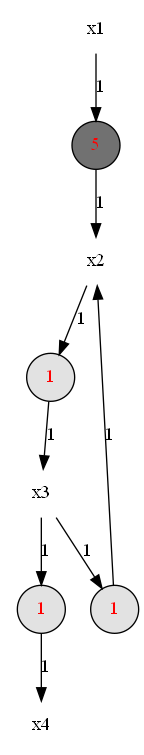

In [4]:
pnet = PetriNet.read_dot_file(fname, verbose=True)
pnet.draw(jupyter=True, inv_arcs=None)

In [5]:
inv_arcs = pnet.get_arcs_from_name_pairs([("x3", "pCC"), ("pCC", "x2")]) 


places:
(pL, 5)
(pC, 1)
(pR, 1)
(pCC, 1)

arcs:
(('x1', 'pL'), 1, False)
(('pL', 'x2'), 1, False)
(('x2', 'pC'), 1, False)
(('pC', 'x3'), 1, False)
(('x3', 'pR'), 1, False)
(('pCC', 'x2'), 1, False)
(('x3', 'pCC'), 1, False)
(('pR', 'x4'), 1, False)

transitions:

name=x1
in_arcs:
out_arcs:
(('x1', 'pL'), 1, False)

name=x2
in_arcs:
(('pL', 'x2'), 1, False)
(('pCC', 'x2'), 1, False)
out_arcs:
(('x2', 'pC'), 1, False)

name=x3
in_arcs:
(('pC', 'x3'), 1, False)
out_arcs:
(('x3', 'pR'), 1, False)
(('x3', 'pCC'), 1, False)

name=x4
in_arcs:
(('pR', 'x4'), 1, False)
out_arcs:


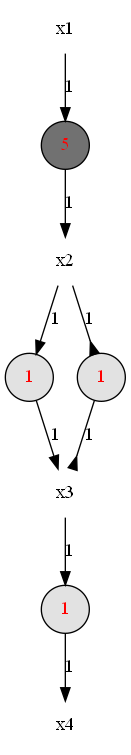

In [6]:
pnet = PetriNet.read_dot_file(fname, verbose=True)
pnet.draw(jupyter=True, inv_arcs=inv_arcs)

current markings: [('pL', 5), ('pC', 1), ('pR', 1), ('pCC', 1)]


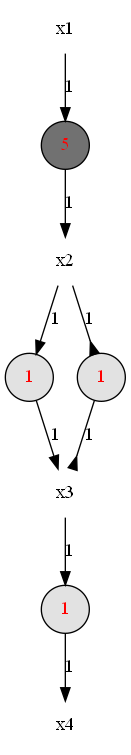

Fired transition x2.
current markings: [('pL', 4), ('pC', 2), ('pR', 1), ('pCC', 0)]


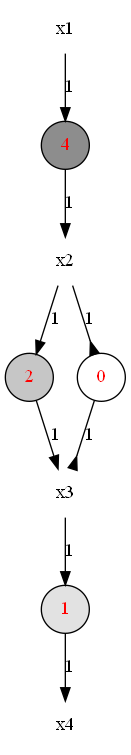

In [7]:
tra = pnet.get_tra_from_name("x2")
pnet.describe_current_markings()
pnet.draw(jupyter=True, inv_arcs=inv_arcs)
pnet.fire_transition(tra)
pnet.describe_current_markings()
pnet.draw(jupyter=True, inv_arcs=inv_arcs)

In [8]:
firing_tras0=pnet.get_firing_tras_from_names(["x1", "x2", "x3", "x4"])

Fired transition x1.
Fired transition x2.
Fired transition x3.
Fired transition x4.
current markings: [('pL', 5), ('pC', 1), ('pR', 1), ('pCC', 1)]


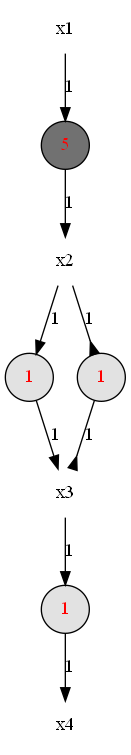

In [9]:
pnet = PetriNet.read_dot_file(fname)
pnet.fire_transition_list(firing_tras=firing_tras0)
pnet.draw(jupyter=True, inv_arcs=inv_arcs)

In [10]:
from widget_utils import *
 
pnet = PetriNet.read_dot_file(fname)
step_num = 0
refresh = True

create_step_button(
    refresh, 
    pnet.inner_step, 
    firing_tras=firing_tras0,
    inv_arcs=inv_arcs)

Button(description='Step', style=ButtonStyle())

Output()